In [1]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [2]:
! matplotlib inline

/bin/sh: matplotlib: command not found


In [3]:
dfm = pd.read_csv('output_cls32/cls_rf.csv')
len(dfm)
dfm.head(2)

,cls,rcen,freq,hit,N,prob
0,0,1,1,36847,2077468,0.017736
1,0,1,2,18554,364568,0.050893


In [18]:
cls_N_dfm = dfm.groupby('cls').N.sum()
cls_H_dfm = dfm.groupby('cls').hit.sum()
#cls_prob_dfm = dfm.groupby('cls').prob.mean()
cls_summary_dfm = pd.merge(cls_H_dfm, cls_N_dfm, left_index=True, right_index=True)
cls_summary_dfm = pd.merge(cls_summary_dfm, cls_prob_dfm, left_index=True, right_index=True)
#print(cls_summary_dfm)
cls_summary_dfm['total_prob'] = cls_summary_dfm.hit / cls_summary_dfm.N
cls_summary_dfm = cls_summary_dfm.reset_index()
cls_summary_dfm.columns = ['class', 'view', 'N', 'avg_prob', 'total_prob']
cls_summary_dfm.to_csv('output_cls32/cls_summary.csv', index=False)
cls_summary_dfm

,class,view,N,avg_prob,total_prob
0,0,356761,60200042,0.036958,0.005926
1,1,433583,78450529,0.029844,0.005527
2,2,516650,92068919,0.036391,0.005612
3,3,100742,15722824,0.035561,0.006407
4,4,80513,13680192,0.033013,0.005885
5,5,33031,6701550,0.025723,0.004929
6,6,61426,10697299,0.026091,0.005742
7,7,28373,4426771,0.032305,0.006409
8,8,57267,10952484,0.019997,0.005229
9,9,16356,2855698,0.023929,0.005727


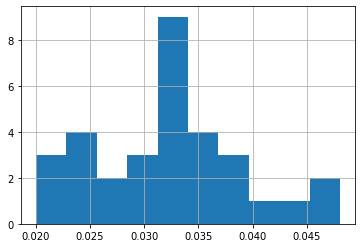

In [21]:
cls_summary_dfm.avg_prob.hist()

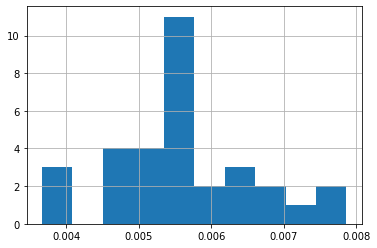

In [22]:
cls_summary_dfm.total_prob.hist()

In [6]:
CLS = dfm.cls.unique().tolist()
print(CLS)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [27]:
XX
for i, cls in enumerate(CLS):
    c_dfm = dfm[dfm.cls==cls]
    Z = []
    Freq = c_dfm.freq.unique().tolist()
    Rcen = c_dfm.rcen.unique().tolist()
    for freq in Freq:
        for rcen in Rcen:
            try:
                val = c_dfm[(c_dfm.freq==freq) & (c_dfm.rcen==rcen)].prob.iloc[0]
            except:
                val = 0.0   
            Z.append(val)
    Z = np.array(Z).reshape((len(Freq), len(Rcen)))
    X, Y = np.meshgrid(Rcen, Freq)

    fig = plt.figure(figsize=(20, 30))
    ax = fig.add_subplot(8, 4, i+1
                         , projection="3d"
                         , title='Class:%02d' % cls
                         , xlabel='r'
                         , ylabel='f'
                         , zlabel='p'
                         , xlim = (-1, 29)
                         , ylim = (-1, 41)
                         , zlim = (0, 0.5)
                         , xticks = (range(0, 32, 8))
                         , yticks = (range(0, 44, 12))
                         , zticks = (0, 0.1, 0.2, 0.3, 0.4, 0.5)
                        )
    ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3)
    #break

NameError: name 'XX' is not defined

/Users/iwanaga/.pyenv/default/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


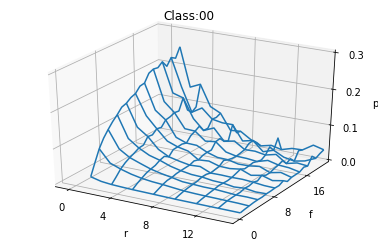

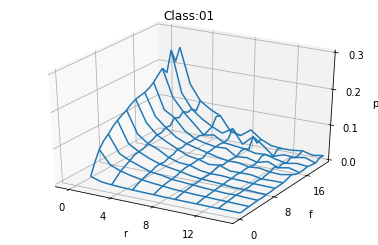

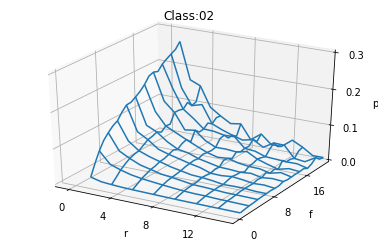

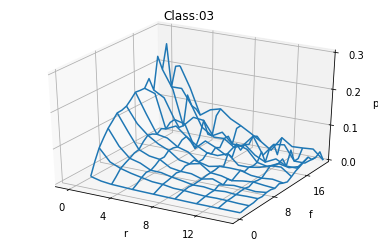

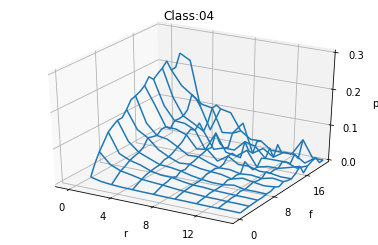

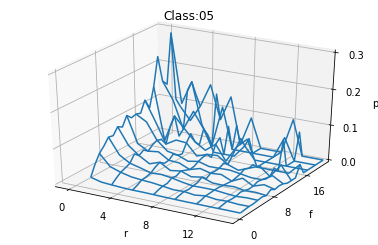

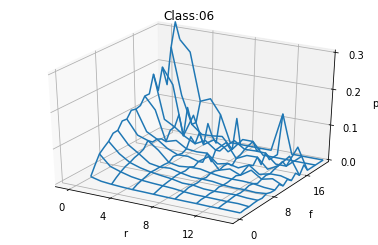

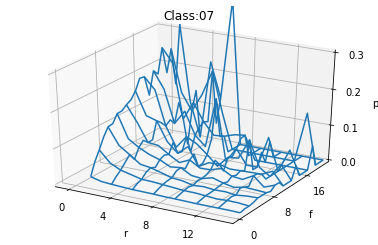

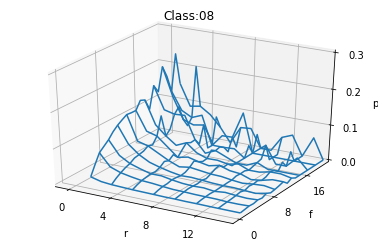

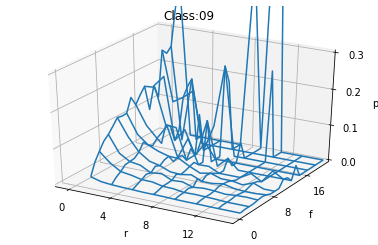

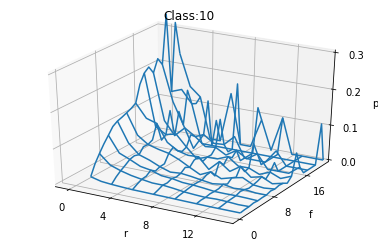

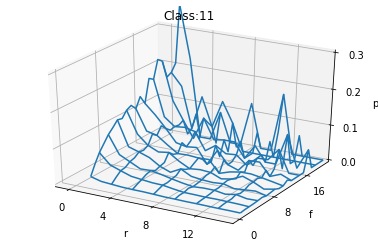

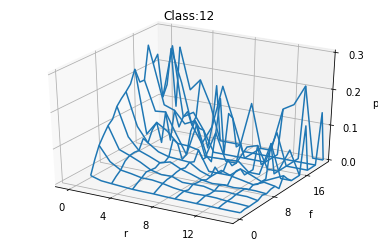

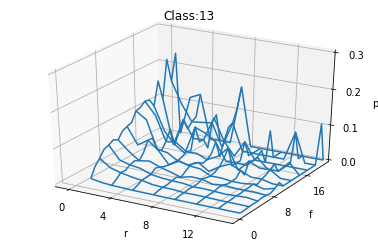

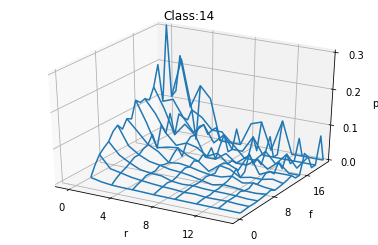

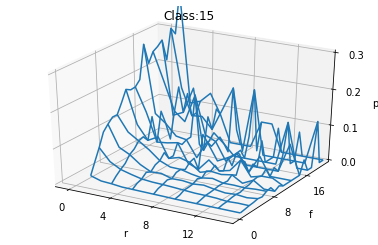

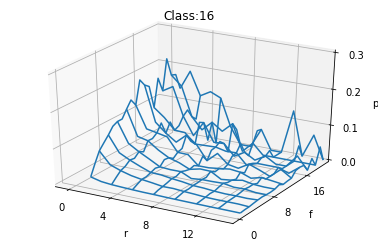

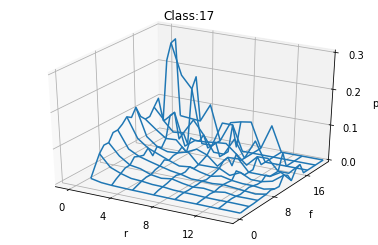

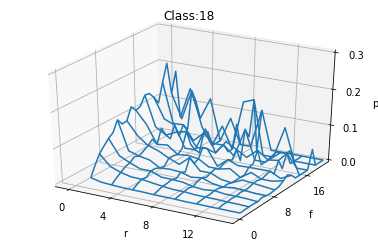

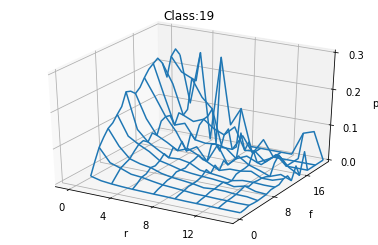

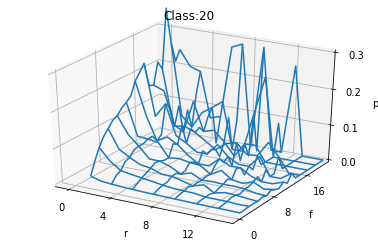

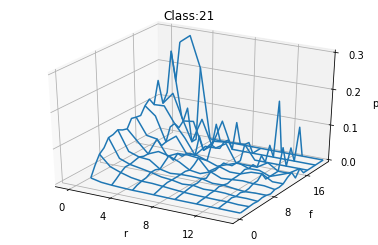

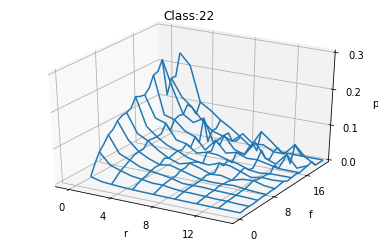

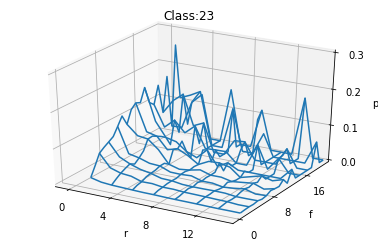

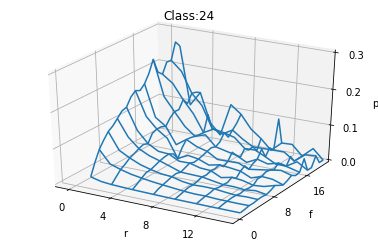

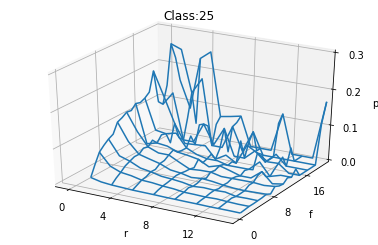

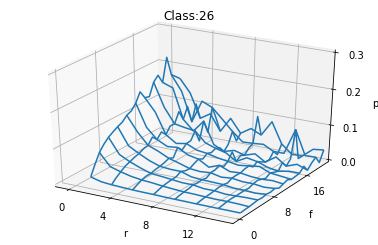

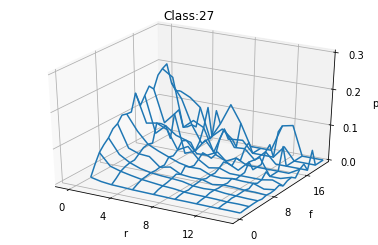

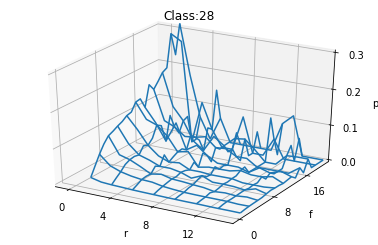

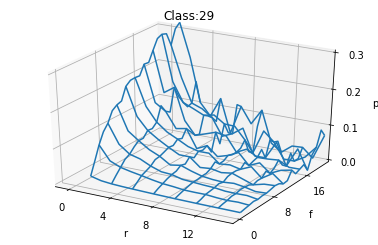

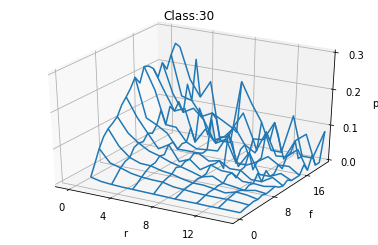

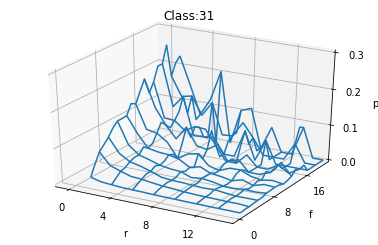

In [28]:
for i, cls in enumerate(CLS):
    c_dfm = dfm[dfm.cls==cls]
    Z = []
    Freq = c_dfm.freq.unique().tolist()[:21]
    Rcen = c_dfm.rcen.unique().tolist()[:15]
    for freq in Freq:
        for rcen in Rcen:
            try:
                val = c_dfm[(c_dfm.freq==freq) & (c_dfm.rcen==rcen)].prob.iloc[0]
            except:
                val = 0.0   
            Z.append(val)
    Z = np.array(Z).reshape((len(Freq), len(Rcen)))
    X, Y = np.meshgrid(Rcen, Freq)

    fig = plt.figure(figsize=(30, 40))
    ax = fig.add_subplot(8, 4, i+1
                         , projection="3d"
                         , title='Class:%02d' % cls
                         , xlabel='r'
                         , ylabel='f'
                         , zlabel='p'
                         , xlim = (-1, 15)
                         , ylim = (-1, 21)
                         , zlim = (0, 0.3)
                         , xticks = (range(0, 16, 4))
                         , yticks = (range(0, 21, 8))
                         , zticks = (0, 0.1, 0.2, 0.3)
                        )
    ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)
    #break